## IST 736 - Final Project- Emotion Classification on Tweets 

### Team Members
#### Jaishree Palaniswamy
#### Karthik Thokala
#### Priyanka Yellati

In [106]:
import numpy as np
import pandas as p
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import FreqDist
from sklearn.model_selection import train_test_split


In [142]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import itemfreq
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

In [111]:
train_anger=p.read_csv("EI-reg-En-anger-train.txt", delimiter='\t')
train_fear=p.read_csv("EI-reg-En-fear-train.txt", delimiter='\t')
train_joy=p.read_csv("EI-reg-En-joy-train.txt", delimiter='\t')
train_sadness=p.read_csv("EI-reg-En-sadness-train.txt", delimiter='\t')

In [126]:
tweets_df = p.concat([train_anger, train_fear, train_joy, train_sadness], ignore_index=True)

In [127]:
X = tweets_df['Tweet']
ysent = tweets_df['Affect Dimension']

In [128]:
import re

In [129]:
def text_cleaning(input_text):
    input_text = re.sub(u'http\S+|@\S+', ' ', input_text)
    input_text = re.sub(u'^(.{140}).*$', '\g<1>', input_text)
    #input_text = contractions.fix(input_text)
    #input_text = unidecode.unidecode(input_text)
    input_text = re.sub(u'[^a-zA-Z]', ' ', input_text)
    #input_text = stop
    input_text = input_text.lower()
    output_text = ' '.join(input_text.split())
    return output_text


In [131]:
tweets_df.insert(
    loc=1,
    column='cleaned_Tweet',
    value= tweets_df['Tweet'].map(text_cleaning)
)

In [132]:
def extract_hashtags(text):
      
    # the regular expression
    regex = "#(\w+)"
      
    # extracting the hashtags
    hashtag_list = re.findall(regex, text)
    return hashtag_list

In [147]:
hashtags = []
for i in tweets_df['Tweet']:
    hashtags.append(extract_hashtags(i))

In [148]:
flatlist = [item for elem in hashtags for item in elem]

In [135]:
flatlist

['offended',
 'Winner',
 'relentless',
 'success',
 'bitter',
 'soreloser',
 'washed',
 'fuming',
 'rage',
 'listen',
 'speak',
 'bitter',
 'bitter',
 'FTW',
 'xph',
 'sting',
 'icq',
 'angry',
 'GBBO',
 'angry',
 'fuming',
 'getitgirl',
 'girlpower',
 'anger',
 'rawr',
 'ChicagoPD',
 'outrage',
 'offended',
 'quit',
 'youredumb',
 'liveyourownlife',
 'rant',
 'angry',
 'KeithScott',
 'hesananimal',
 'KGB',
 'G',
 'fury',
 'raging',
 'revenge',
 'Scorpio',
 'relentless',
 'OurHouse',
 'OneJersey',
 'werealldevilsinside',
 'NJDevils',
 'DragRace',
 'AllStars2',
 'teamalaska',
 'teamkatya',
 'revenge',
 'bwahaha',
 'emo',
 'scene',
 'fuck',
 'die',
 'hatered',
 'thanks',
 'TheJail',
 'bitter',
 'treatcustomersfairly',
 'disappointment',
 'wiz',
 'bitter',
 'bitter',
 'bb18',
 'survivor',
 'savage',
 'uhoh',
 'angry',
 'yikes',
 'offense',
 'oldcunt',
 'snap',
 'wasted',
 'fuming',
 'outrage',
 'lit',
 'fire',
 'bestdayever',
 'magic',
 'work',
 'snapchat',
 'tomourssuck',
 'prayinsnotcan

In [136]:
Hashs = ' '.join([str(elem) for elem in flatlist]) 
  
print(Hashs)

offended Winner relentless success bitter soreloser washed fuming rage listen speak bitter bitter FTW xph sting icq angry GBBO angry fuming getitgirl girlpower anger rawr ChicagoPD outrage offended quit youredumb liveyourownlife rant angry KeithScott hesananimal KGB G fury raging revenge Scorpio relentless OurHouse OneJersey werealldevilsinside NJDevils DragRace AllStars2 teamalaska teamkatya revenge bwahaha emo scene fuck die hatered thanks TheJail bitter treatcustomersfairly disappointment wiz bitter bitter bb18 survivor savage uhoh angry yikes offense oldcunt snap wasted fuming outrage lit fire bestdayever magic work snapchat tomourssuck prayinsnotcancer angry allstars RuPaul disgusted Hudcomedy AdamRowe insult offended outrage Sharpton blm TheFive burning beating looting toussaintromain stop kik kikme kikmessage boredaf bored snapchatme snapchat country countrygirl fume renewtherivalry imyourdaddy cantbeatme madden tater angry shouldofgonewithvirgin hangry day5 snapme dm nudes trib

## Word cloud for Most common words in Tweets

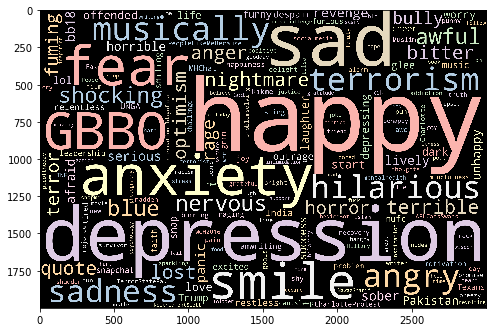

In [211]:
# Import package
from wordcloud import WordCloud
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Pastel1', collocations=False, stopwords = "English").generate(Hashs)
# Plot
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)

In [ ]:
tweets_df.insert(
    loc=1,
    column='Hashtags',
    value= hashtags
)

## Most Frequent Hastags for Anger, Joy, Sadness, fear using NLTK Frequency Dist

In [150]:
Emotions = ['anger', 'joy', 'sadness', 'fear']
Hashtags = []
flatList_tags = []
for i in range(0,len(Emotions)):
    a = len(tweets_df.loc[tweets_df['Affect Dimension'] == Emotions[i]])
    x = []
    for j in range (0,a):
        x.append(tweets_df.loc[tweets_df['Affect Dimension'] == Emotions[i], 'Hashtags'].iloc[j])
    Hashtags.append(x)
    
    flatList_tags.append([item for elem in Hashtags[i] for item in elem])

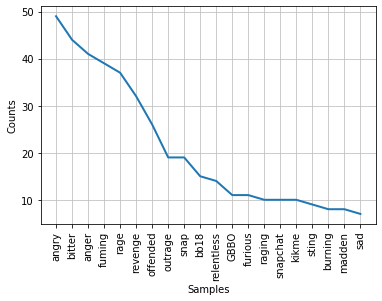

In [151]:
#  Most Frequuent hashtags For Anger
distFile_tagAnger = FreqDist(flatList_tags[0])
distFile_tagAnger.plot(20, cumulative= False)

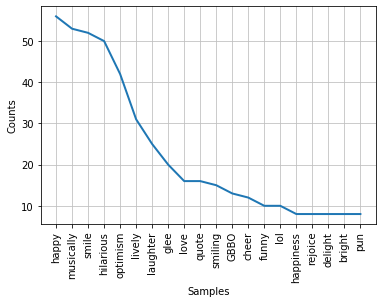

In [27]:
#  Most Frequent hashtags For Joy
distFile_tagJoy = FreqDist(flatList_tags[1])
distFile_tagJoy.plot(20, cumulative= False)

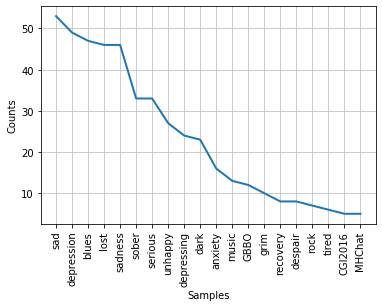

In [28]:
#  Most Frequent hashtags For Sadness
distFile_tagSad = FreqDist(flatList_tags[2])
distFile_tagSad.plot(20, cumulative= False)

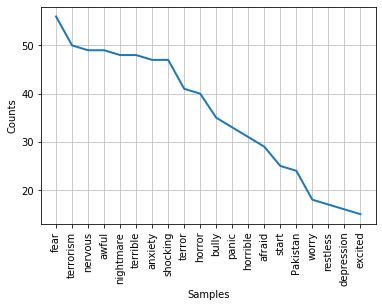

In [29]:
#  Most Frequent hashtags For fear
distFile_tagFear = FreqDist(flatList_tags[3])
distFile_tagFear.plot(20, cumulative= False)

### Word cloud with popular hashtags

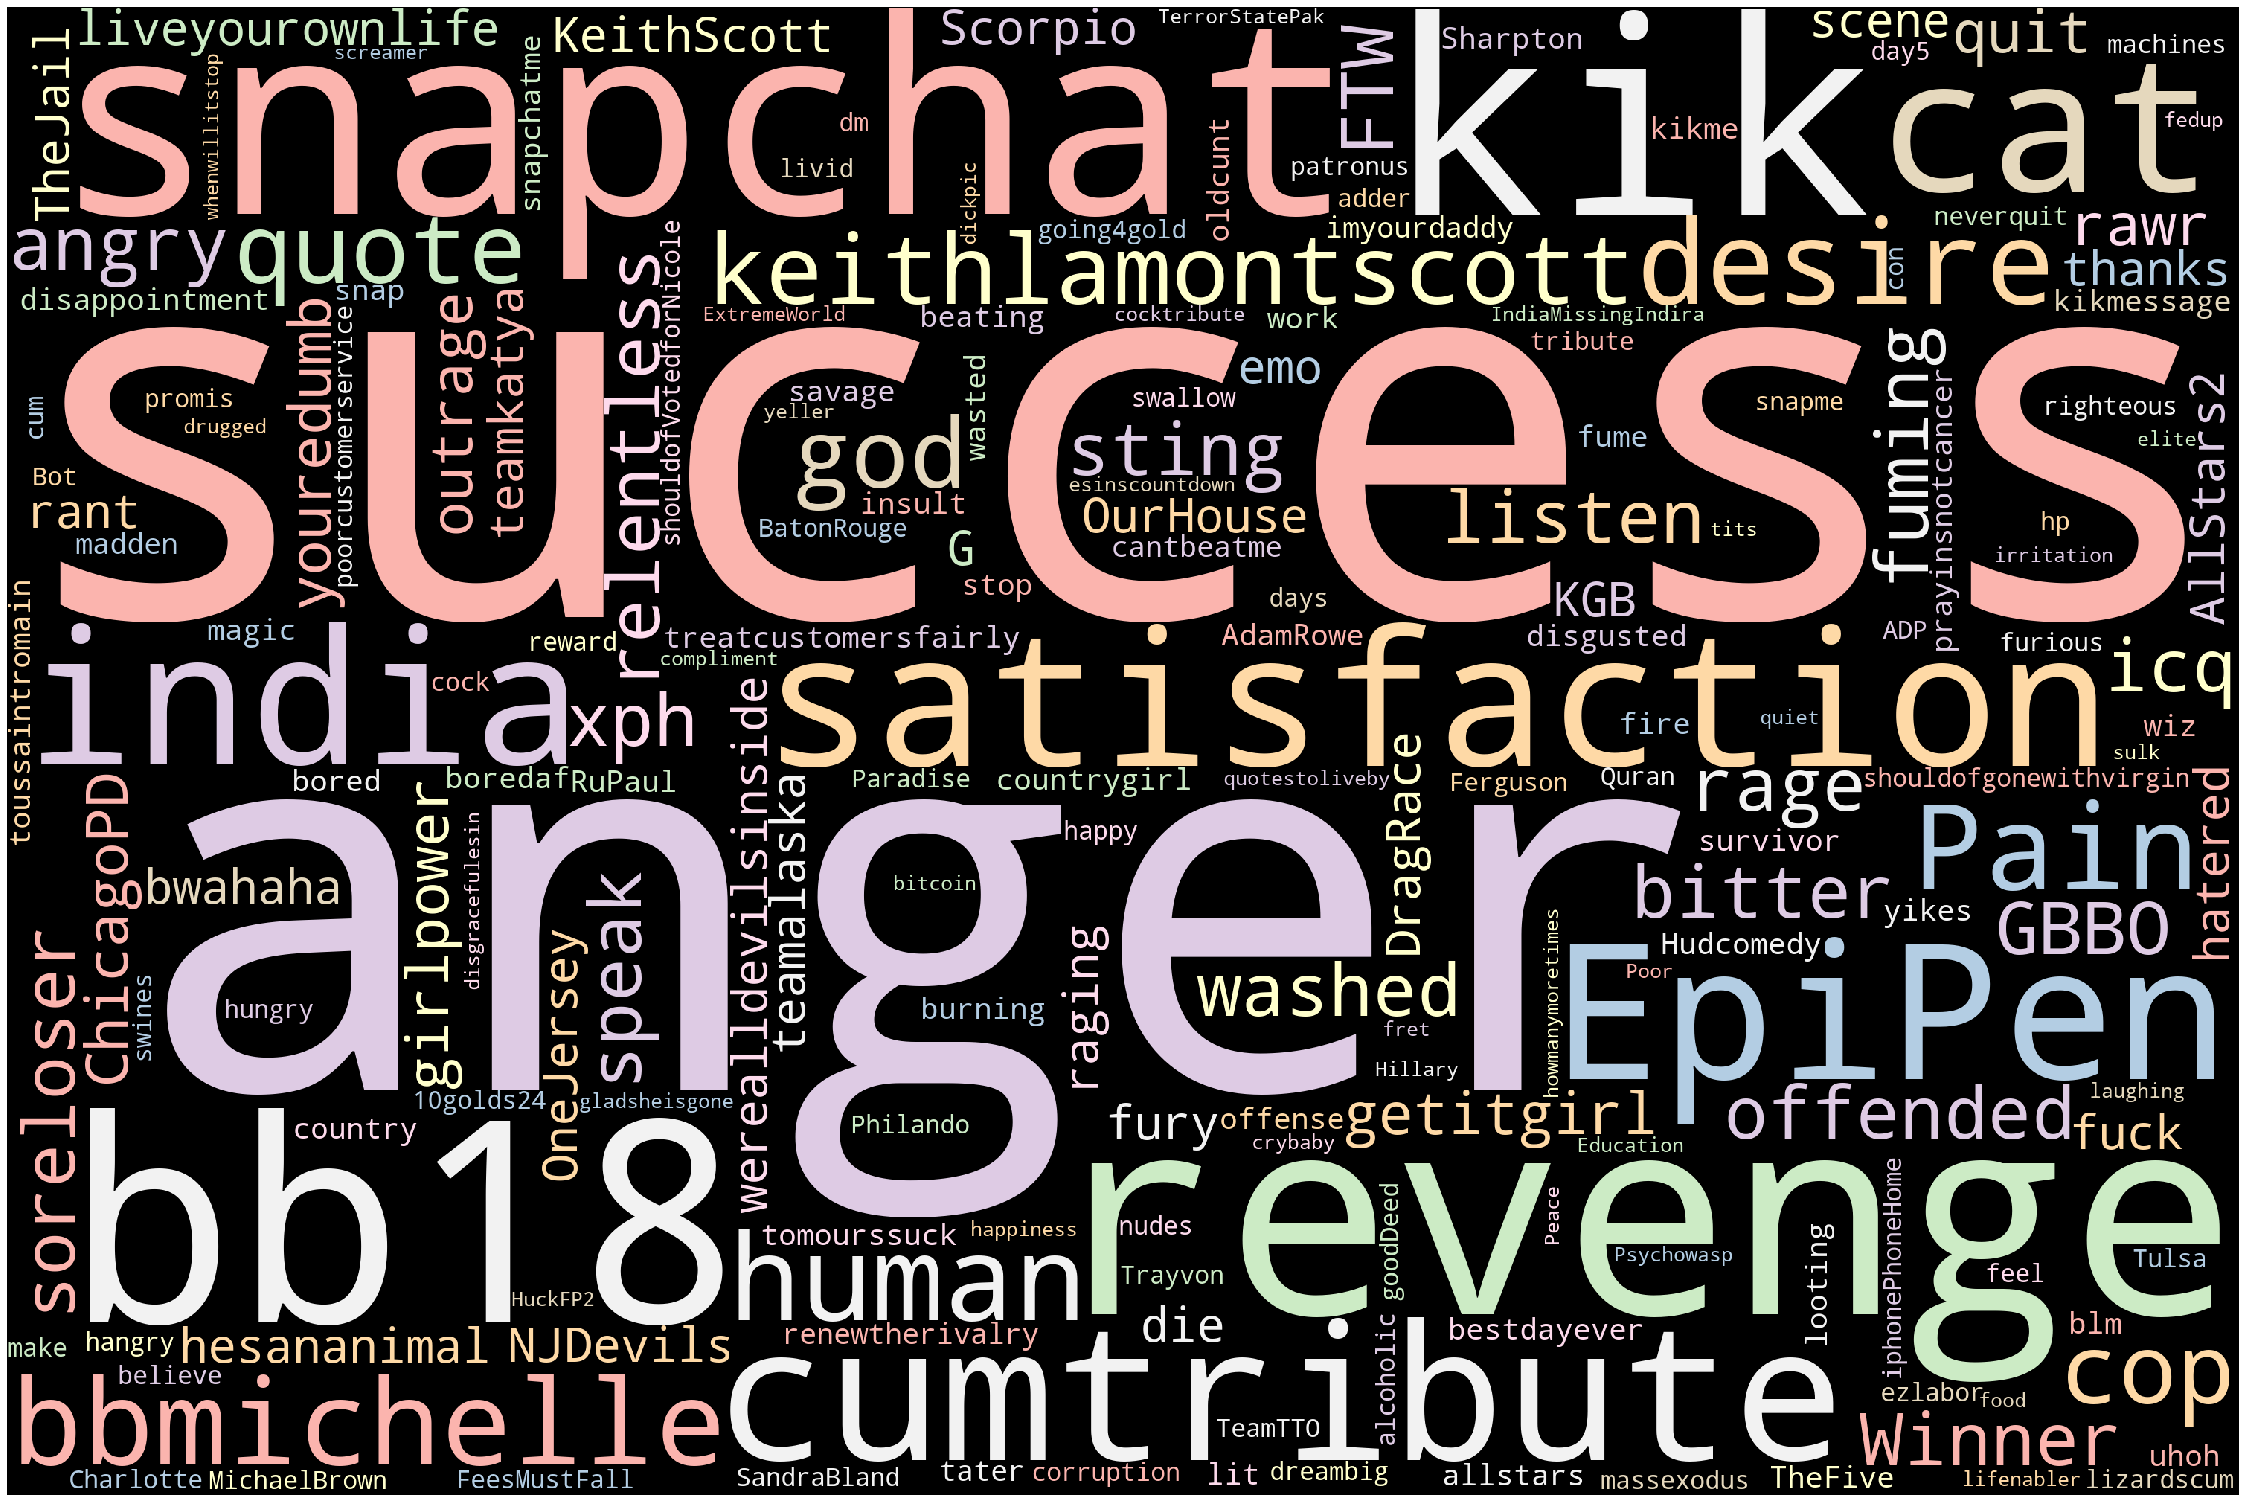

In [156]:
StrAdj = ' '.join([str(elem) for elem in distFile_tagAnger]) 
#print(StrAdj)

# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

import os
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS

# Import package
from wordcloud import WordCloud
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(StrAdj)
# Plot
plot_cloud(wordcloud)

### Stop Words Removal

In [163]:
stopwords = nltk.corpus.stopwords.words('english')

def removeStopwords(flatList, stopwords):
  return [w for w in flatList if w.lower() not in stopwords]

## Most frequent words for Anger

In [157]:
Emotions = ['anger', 'joy', 'sadness', 'fear']
Emotion_tweets = []
words = []
flatList_tweets = []

for i in range(0,len(Emotions)):
    a = len(tweets_df.loc[tweets_df['Affect Dimension'] == Emotions[i]])
    y = []
    for j in range (0,a):
        y.append(tweets_df.loc[tweets_df['Affect Dimension'] == Emotions[i], 'cleaned_Tweet'].iloc[j])
        words.append([nltk.word_tokenize(k) for k in y])
    Emotion_tweets.append(y)
    
    flatList_tweets.append([item for elem in Emotion_tweets[i] for item in elem])

KeyboardInterrupt: 

### Most Frequent words using Count Vectorizer and TFIDF Vectorizer

In [158]:
Anger_list = []
a = len(tweets_df.loc[tweets_df['Affect Dimension'] == 'anger'])
for i in range (0,a):
    Anger_list.append(tweets_df.loc[tweets_df['Affect Dimension'] == 'anger', 'cleaned_Tweet'].iloc[i])
    

### Most Frequent Bigrams for Count Vectorizer

In [159]:
CountVect = CountVectorizer(stop_words='english', ngram_range=(2,3), min_df = 3, encoding='latin-1')
TfidfVect = TfidfVectorizer(stop_words='english', ngram_range=(2,3), min_df = 3, encoding='latin-1')
# matrix of ngrams
ngrams = CountVect.fit_transform(Anger_list)
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = CountVect.vocabulary_
word_list = CountVect.get_feature_names();   
freq = dict(zip(word_list,count_values))
#freq
a = sorted(freq.items(), key=lambda item: item[1],  reverse = True)
a[:10]

[('blood boiling', 9),
 ('don know', 8),
 ('don want', 8),
 ('kik kikme', 8),
 ('ve got', 8),
 ('best revenge', 7),
 ('holding grudge', 7),
 ('black people', 6),
 ('don like', 6),
 ('fury like', 6)]

In [39]:
ngrams = TfidfVect.fit_transform(Anger_list)
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = TfidfVect.vocabulary_
word_list = TfidfVect.get_feature_names();   
freq = dict(zip(word_list,count_values))
#freq
a = sorted(freq.items(), key=lambda item: item[1],  reverse = True)
a[:10]

[('blood boiling', 9.0),
 ('best revenge', 7.0),
 ('don know', 6.908854128192074),
 ('holding grudge', 6.713684261100132),
 ('ve got', 6.674756116667528),
 ('kik kikme', 6.361271023185797),
 ('don like', 6.0),
 ('don want', 5.9617739301973955),
 ('hold grudge', 5.67731891110668),
 ('people irritate', 5.67731891110668)]

In [160]:
tokenized_AngerList = [nltk.word_tokenize(i) for i in Anger_list]
wordlist = []
for i in tokenized_AngerList:
    wordlist.append(i)

In [164]:
flatList = [ item for elem in wordlist for item in elem]

In [165]:
Wordfile = removeStopwords(flatList, stopwords)

In [166]:
from nltk import FreqDist

In [167]:
distFile_anger = FreqDist(Wordfile)

### Top 50 Frequent words for Anger

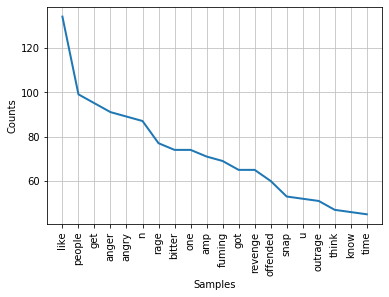

In [165]:
distFile_anger.plot(20, cumulative= False)

##  Most Frequent words of Joy

In [169]:
Joy_list = []
a = len(tweets_df.loc[tweets_df['Affect Dimension'] == 'joy'])
for i in range (0,a):
    Joy_list.append(tweets_df.loc[tweets_df['Affect Dimension'] == 'joy', 'cleaned_Tweet'].iloc[i])

    
tokenized_JoyList = [nltk.word_tokenize(i) for i in Joy_list]
wordlist_Joy = []
for i in tokenized_JoyList:
    wordlist_Joy.append(i)
    
    
flatList = [ item for elem in wordlist_Joy for item in elem]

Wordfile_Joy = removeStopwords(flatList, stopwords)

In [170]:
distFile_joy = FreqDist(Wordfile_Joy)

### Most Frequent words for JOY using Count Vectorizer and TFIDF Vectorizer

In [53]:
ngrams = CountVect.fit_transform(Joy_list)
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = CountVect.vocabulary_
word_list = CountVect.get_feature_names();   
freq = dict(zip(word_list,count_values))
#freq
a = sorted(freq.items(), key=lambda item: item[1],  reverse = True)
a[:10]

[('amazing live', 55),
 ('amazing live ly', 55),
 ('live ly', 55),
 ('live ly broadcast', 55),
 ('ly broadcast', 55),
 ('watch amazing', 55),
 ('watch amazing live', 55),
 ('broadcast lively', 28),
 ('ly broadcast lively', 28),
 ('broadcast lively musically', 27)]

In [55]:
ngrams = TfidfVect.fit_transform(Joy_list)
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = CountVect.vocabulary_
word_list = TfidfVect.get_feature_names();   
freq = dict(zip(word_list,count_values))
#freq
a = sorted(freq.items(), key=lambda item: item[1],  reverse = True)
a[:10]

[('amazing live', 16.72510038266132),
 ('amazing live ly', 16.72510038266132),
 ('live ly', 16.72510038266132),
 ('live ly broadcast', 16.72510038266132),
 ('ly broadcast', 16.72510038266132),
 ('watch amazing', 16.72510038266132),
 ('watch amazing live', 16.72510038266132),
 ('happy birthday', 14.864550371896092),
 ('sparkling water', 12.0),
 ('broadcast musically', 9.731545270698879)]

### Top 50 Frequent words of JOY

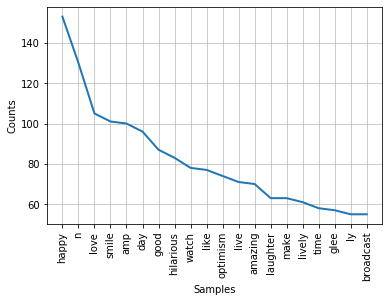

In [56]:
distFile_joy.plot(20, cumulative= False)

## Most frequent words of fear

In [171]:
Fear_list = []
a = len(tweets_df.loc[tweets_df['Affect Dimension'] == 'fear'])
for i in range (0,a):
    Fear_list.append(tweets_df.loc[tweets_df['Affect Dimension'] == 'fear', 'cleaned_Tweet'].iloc[i])
    
    
tokenized_FearList = [nltk.word_tokenize(i) for i in Fear_list]
wordlist_Fear = []
for i in tokenized_FearList:
    wordlist_Fear.append(i)
    
    
flatList1 = [ item for elem in wordlist_Fear for item in elem]

Wordfile_Fear = removeStopwords(flatList1, stopwords)

In [172]:
distFile_Fear = FreqDist(Wordfile_Fear)

### Most Frequent words using Count Vectorizer and TFIDF Vectorizer

In [173]:
ngrams = CountVect.fit_transform(Fear_list)
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = CountVect.vocabulary_
word_list = CountVect.get_feature_names();   
freq = dict(zip(word_list,count_values))
#freq
a = sorted(freq.items(), key=lambda item: item[1],  reverse = True)
a[:10]

[('don know', 19),
 ('just want', 16),
 ('don worry', 12),
 ('don think', 11),
 ('feel like', 11),
 ('horror story', 11),
 ('american horror', 9),
 ('american horror story', 9),
 ('don let', 9),
 ('horror movie', 9)]

In [174]:
ngrams = TfidfVect.fit_transform(Fear_list)
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = CountVect.vocabulary_
word_list = TfidfVect.get_feature_names();   
freq = dict(zip(word_list,count_values))
#freq
a = sorted(freq.items(), key=lambda item: item[1],  reverse = True)
a[:10]

[('don know', 16.067935680348434),
 ('just want', 14.151425692549891),
 ('don worry', 11.285739942164415),
 ('feel like', 10.668945684516283),
 ('don think', 10.473275996880387),
 ('horror movie', 8.65852929139545),
 ('don let', 7.996602217117379),
 ('panic attack', 7.329174746820519),
 ('customer service', 7.0),
 ('horror story', 6.554134835153846)]

## Top 50 frequent words of fear

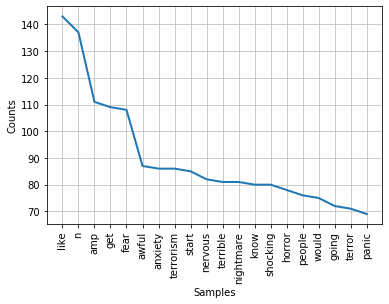

In [175]:
distFile_Fear.plot(20, cumulative= False)

## Frequent words of Sadness

In [176]:
Sadness_list = []
a = len(tweets_df.loc[tweets_df['Affect Dimension'] == 'sadness'])
for i in range (0,a):
    Sadness_list.append(tweets_df.loc[tweets_df['Affect Dimension'] == 'sadness', 'cleaned_Tweet'].iloc[i])
    
tokenized_SadList = [nltk.word_tokenize(i) for i in Sadness_list]
wordlist_sad = []
for i in tokenized_SadList:
    wordlist_sad.append(i)
    
    
flatList1 = [ item for elem in wordlist_sad for item in elem]

Wordfile_Sad = removeStopwords(flatList1, stopwords)

In [177]:
distFile_Sad = FreqDist(Wordfile_Sad)

### Most Frequent words of SADNESS using Count Vectorizer and TFIDF Vectorizer

In [178]:
ngrams = CountVect.fit_transform(Sadness_list)
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = CountVect.vocabulary_
word_list = CountVect.get_feature_names();   
freq = dict(zip(word_list,count_values))
#freq
a = sorted(freq.items(), key=lambda item: item[1],  reverse = True)
a[:10]

[('feel like', 14),
 ('don know', 11),
 ('don think', 10),
 ('depression anxiety', 7),
 ('don discouraged', 7),
 ('weary doing', 7),
 ('anxiety depression', 6),
 ('doing good', 6),
 ('grow weary', 6),
 ('grow weary doing', 6)]

In [179]:
ngrams = TfidfVect.fit_transform(Sadness_list)
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = CountVect.vocabulary_
word_list = TfidfVect.get_feature_names();   
freq = dict(zip(word_list,count_values))
#freq
a = sorted(freq.items(), key=lambda item: item[1],  reverse = True)
a[:10]

[('feel like', 12.858913258878482),
 ('don think', 9.177798428788469),
 ('don know', 8.958285477518185),
 ('don discouraged', 6.730378559162847),
 ('penny dreadful', 6.0),
 ('depression anxiety', 5.774663258086745),
 ('let know', 5.35369207175804),
 ('don wanna', 5.0),
 ('doom gloom', 5.0),
 ('fucking dreadful', 5.0)]

### Top 50 frequent words of sadness

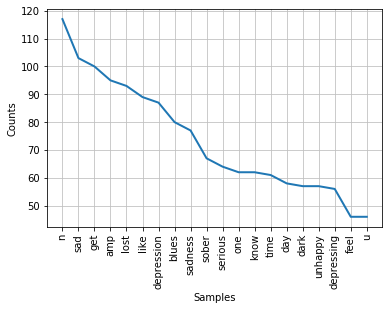

In [180]:
distFile_Sad.plot(20, cumulative= False)

In [181]:
from scipy.stats import itemfreq

In [182]:
y=tweets_df['Affect Dimension'].values
X=tweets_df['cleaned_Tweet'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

training_labels = set(y_train)
print("Training data labels:", training_labels)

training_category_dist = itemfreq(y_train)
print("Training data category:",training_category_dist)

test_labels = set(y_test)
print("Testing data labels:",test_labels)

test_category_dist = itemfreq(y_test)
print("Testing data category:",test_category_dist)

(4971,) (4971,) (2131,) (2131,)
Training data labels: {'sadness', 'anger', 'joy', 'fear'}
Training data category: [['anger' 1199]
 ['fear' 1567]
 ['joy' 1124]
 ['sadness' 1081]]
Testing data labels: {'sadness', 'anger', 'joy', 'fear'}
Testing data category: [['anger' 502]
 ['fear' 685]
 ['joy' 492]
 ['sadness' 452]]


C:\Users\PRIYANKA\anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\PRIYANKA\anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`


## Model Implementation

## Multinomial Naive Bayes

In [184]:
#Unigram term frequency vectorizer
unigram_count_vectorizer = CountVectorizer(encoding='latin-1', binary=False, min_df=2, stop_words='english')
X_train_vec = unigram_count_vectorizer.fit_transform(X_train)
print("Shape of the X_train:", X_train_vec.shape)

X_test_vec = unigram_count_vectorizer.transform(X_test)
print("Shape of the X_test:",X_test_vec.shape)

# Multinomial Naive Bayes Model
nb_clf= MultinomialNB()
nb_clf.fit(X_train_vec,y_train)

y_pred = nb_clf.predict(X_test_vec)
cm_unigram = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm_unigram)

print(nb_clf.score(X_test_vec,y_test))

# Accuracy, Precision and Recall
print("Accuracy:", accuracy_score(y_test,y_pred))
print("Precision:", precision_score(y_test, y_pred, average=None))
print("Recall:", recall_score(y_test, y_pred, average=None))

print(classification_report(y_test, y_pred,digits =4))

Shape of the X_train: (4971, 4597)
Shape of the X_test: (2131, 4597)
Confusion Matrix:
 [[416  31  14  41]
 [ 36 567  27  55]
 [ 12  20 429  31]
 [ 49  58  15 330]]
0.8174565931487564
Accuracy: 0.8174565931487564
Precision: [0.81091618 0.8387574  0.88453608 0.72210066]
Recall: [0.82868526 0.82773723 0.87195122 0.7300885 ]
              precision    recall  f1-score   support

       anger     0.8109    0.8287    0.8197       502
        fear     0.8388    0.8277    0.8332       685
         joy     0.8845    0.8720    0.8782       492
     sadness     0.7221    0.7301    0.7261       452

    accuracy                         0.8175      2131
   macro avg     0.8141    0.8146    0.8143      2131
weighted avg     0.8180    0.8175    0.8177      2131



In [185]:
#bigram 
bigram_count_vectorizer = CountVectorizer(encoding='latin-1', binary=False, min_df=2, ngram_range = (1,2),
                                           stop_words='english')
X_train_vec = bigram_count_vectorizer.fit_transform(X_train)
print("Shape of the X_train:", X_train_vec.shape)

X_test_vec = bigram_count_vectorizer.transform(X_test)
print("Shape of the X_test:",X_test_vec.shape)

# Multinomial Naive Bayes Model
nb_clf= MultinomialNB()
nb_clf.fit(X_train_vec,y_train)

y_pred = nb_clf.predict(X_test_vec)
cm_unigram = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm_unigram)

print(nb_clf.score(X_test_vec,y_test))

# Accuracy, Precision and Recall
print("Accuracy:", accuracy_score(y_test,y_pred))
print("Precision:", precision_score(y_test, y_pred, average=None))
print("Recall:", recall_score(y_test, y_pred, average=None))

print(classification_report(y_test, y_pred,digits =4))


Shape of the X_train: (4971, 9118)
Shape of the X_test: (2131, 9118)
Confusion Matrix:
 [[413  30  15  44]
 [ 36 568  24  57]
 [ 11  22 429  30]
 [ 46  59  15 332]]
0.8174565931487564
Accuracy: 0.8174565931487564
Precision: [0.81620553 0.8365243  0.88819876 0.71706263]
Recall: [0.82270916 0.82919708 0.87195122 0.73451327]
              precision    recall  f1-score   support

       anger     0.8162    0.8227    0.8194       502
        fear     0.8365    0.8292    0.8328       685
         joy     0.8882    0.8720    0.8800       492
     sadness     0.7171    0.7345    0.7257       452

    accuracy                         0.8175      2131
   macro avg     0.8145    0.8146    0.8145      2131
weighted avg     0.8183    0.8175    0.8178      2131



In [186]:
# trigram Count vectorizer
trigram_count_vectorizer = CountVectorizer(encoding='latin-1', binary=False, min_df=2, ngram_range = (1,3),
                                           stop_words='english')
X_train_vec = trigram_count_vectorizer.fit_transform(X_train)
print("Shape of the X_train:", X_train_vec.shape)

X_test_vec = trigram_count_vectorizer.transform(X_test)
print("Shape of the X_test:",X_test_vec.shape)

# Multinomial Naive Bayes Model
nb_clf= MultinomialNB()
nb_clf.fit(X_train_vec,y_train)

y_pred = nb_clf.predict(X_test_vec)
cm_unigram = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm_unigram)

print(nb_clf.score(X_test_vec,y_test))

# Accuracy, Precision and Recall
print("Accuracy:", accuracy_score(y_test,y_pred))
print("Precision:", precision_score(y_test, y_pred, average=None))
print("Recall:", recall_score(y_test, y_pred, average=None))

print(classification_report(y_test, y_pred,digits =4))



Shape of the X_train: (4971, 12360)
Shape of the X_test: (2131, 12360)
Confusion Matrix:
 [[410  30  16  46]
 [ 35 564  24  62]
 [ 11  21 426  34]
 [ 45  58  15 334]]
0.8137024870952605
Accuracy: 0.8137024870952605
Precision: [0.81836327 0.83803863 0.88565489 0.70168067]
Recall: [0.81673307 0.82335766 0.86585366 0.73893805]
              precision    recall  f1-score   support

       anger     0.8184    0.8167    0.8175       502
        fear     0.8380    0.8234    0.8306       685
         joy     0.8857    0.8659    0.8756       492
     sadness     0.7017    0.7389    0.7198       452

    accuracy                         0.8137      2131
   macro avg     0.8109    0.8112    0.8109      2131
weighted avg     0.8155    0.8137    0.8144      2131



In [192]:
# MNB on trigrams using TFIDF CountVectorizer
trigram_tfidf_vectorizer = TfidfVectorizer(encoding='latin-1', use_idf=True, min_df=2, ngram_range=(1,3), stop_words='english')
X_train_vec = trigram_tfidf_vectorizer.fit_transform(X_train)
print("Shape of the X_train:", X_train_vec.shape)

X_test_vec = trigram_tfidf_vectorizer.transform(X_test)
print("Shape of the X_test:",X_test_vec.shape)

# Multinomial Naive Bayes Model
nb_clf= MultinomialNB()
nb_clf.fit(X_train_vec,y_train)

y_pred = nb_clf.predict(X_test_vec)
cm_unigram = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm_unigram)

print(nb_clf.score(X_test_vec,y_test))

# Accuracy, Precision and Recall
print("Accuracy:", accuracy_score(y_test,y_pred))
print("Precision:", precision_score(y_test, y_pred, average=None))
print("Recall:", recall_score(y_test, y_pred, average=None))

print(classification_report(y_test, y_pred,digits =4))

Shape of the X_train: (4971, 12360)
Shape of the X_test: (2131, 12360)
Confusion Matrix:
 [[402  68   9  23]
 [ 13 640   4  28]
 [ 10  55 412  15]
 [ 43 100  11 298]]
0.8221492257156264
Accuracy: 0.8221492257156264
Precision: [0.85897436 0.74159907 0.94495413 0.81868132]
Recall: [0.80079681 0.93430657 0.83739837 0.65929204]
              precision    recall  f1-score   support

       anger     0.8590    0.8008    0.8289       502
        fear     0.7416    0.9343    0.8269       685
         joy     0.9450    0.8374    0.8879       492
     sadness     0.8187    0.6593    0.7304       452

    accuracy                         0.8221      2131
   macro avg     0.8411    0.8079    0.8185      2131
weighted avg     0.8325    0.8221    0.8210      2131



### Top Features of MNB Model

In [193]:
# 0 - anger, 1 -fear, 2-Joy, 3-Sadness

log = []
features = trigram_tfidf_vectorizer.get_feature_names()
ang_prob = nb_clf.feature_log_prob_[0]
sad_prob = nb_clf.feature_log_prob_[3]

for i in range(0, len(features)):
    log_new= ang_prob[i] - sad_prob[i]
    log.append(log_new)
features = sorted(zip(log, features))

print('Top 10 sad words:\n',features[:10])
print('\nTop 10 anger words:\n',features[-10:])

Top 10 sad words:
 [(-3.06315808361909, 'depression'), (-2.9779006235290986, 'blues'), (-2.8192775810515958, 'depressing'), (-2.716483313393928, 'sadness'), (-2.642976702968986, 'sober'), (-2.5381182656416668, 'grim'), (-2.4003190416201647, 'stayed'), (-2.380562114527775, 'sink'), (-2.3363745024679723, 'dull'), (-2.3075329073810753, 'sadly')]

Top 10 anger words:
 [(2.4003146143238077, 'insult'), (2.4053577270642093, 'offend'), (2.455009639462162, 'bitter'), (2.4931857999672484, 'outrage'), (2.4948699545225885, 'burning'), (2.5512259174413945, 'angry'), (2.7023521461920694, 'rage'), (2.738964329590294, 'snap'), (2.792642605504893, 'revenge'), (2.8215154240069893, 'fuming')]


In [194]:
log = []
features = trigram_tfidf_vectorizer.get_feature_names()
fear_prob = nb_clf.feature_log_prob_[1]
joy_prob = nb_clf.feature_log_prob_[2]

for i in range(0, len(features)):
    log_new= fear_prob[i] - joy_prob[i]
    log.append(log_new)
features = sorted(zip(log, features))

print('Top 10 Joy words:\n',features[:10])
print('\nTop 10 Fear words:\n',features[-10:])

Top 10 Joy words:
 [(-2.9928226802021785, 'optimism'), (-2.9341136604591753, 'hilarious'), (-2.894188727561378, 'cheer'), (-2.8527624084781102, 'glee'), (-2.8207316064038803, 'smiling'), (-2.7051237967464186, 'lively'), (-2.5417888036437457, 'pleasing'), (-2.5224210704353744, 'cheering'), (-2.519819189375095, 'breezy'), (-2.479393530226206, 'musically')]

Top 10 Fear words:
 [(2.4081137680261264, 'alarm'), (2.4615491941169347, 'terrible'), (2.5447723153927475, 'nervous'), (2.5504115211685683, 'horrible'), (2.578457620208244, 'terror'), (2.591630552801604, 'bully'), (2.6316631189008843, 'panic'), (2.6578083531981544, 'terrorism'), (2.69707126217736, 'shocking'), (2.8730523362888265, 'nightmare')]


### Error analysis for MNB

In [197]:
#Anger predicted as Joy

err_cnt = 0
for i in range(0, len(y_test)):
    if(y_test[i]=="anger" and y_pred[i]=="joy"):
        print(X_test[i])
        err_cnt = err_cnt+1
print()
print("errors:", err_cnt)

favourite quote of the year so far is by i swore at a parsnip
looking forward to div next year leictershireaway therey
i love when angry tweets bc it makes me laugh but also hate it bc it makes me miss her more
happy birthday to my seed renewtherivalry imyourdaddy cantbeatme madden tater
happy birthday to my seed renewtherivalry imyourdaddy cantbeatme tater
this amount of greedy mooching makes me snarl
i can definitely feel my irritation today lord give me strength
congress acting indignant over the epipen pricing is quite disingenuous since they craft the laws that allow such gouging
thou wilt be as valiant as the wrathful dove or most magnanimous mouse william shakesphere

errors: 9


In [198]:
#Joy predicted as sadness

err_cnt = 0
for i in range(0, len(y_test)):
    if(y_test[i]=="joy" and y_pred[i]=="sadness"):
        print(X_test[i])
        err_cnt = err_cnt+1
print()
print("errors:", err_cnt)

we re the least known band in the world but so glad you asked muchlove
oh dear an evening of absolute hilarity i don t think i have laughed so much in a long time
manchester united v manchester city happy days efl
you dont have to feel grateful to be grateful for it is written all things work together for good for those who love god
ahh when my voice gets better i ve been asked to play d id be more than happy to do that
apparently all the money in the world can t buy a single person to tell you not give your own waist a hearty two handed pinch while onstage
and thus begins my week holiday n holiday ghastinoir rest
getting my comedic relief w during season premiere of modernfamily just what a girl needs
sometimes i like to talk about my sadness other times i just want to be distracted by friends laughter shopping eating n n mhchat
now getting banned but will still lurk in corners and underneath the bed and sofa much to eyepatch s delight why is she
my two older boys were elated my toddl

### Multinomial Naive Bayes classifier for 5 fold cross validation

In [199]:
X = tweets_df['cleaned_Tweet']
ysent = tweets_df['Affect Dimension']

# cross validation
# accuracy is 0.82.4 before removing stopwords, and 0.83 after.
# choose to not remove stopwords

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
nb_clf_pipe = Pipeline([('vect', CountVectorizer(binary=False, min_df=2)),('nb', MultinomialNB())])
scores = cross_val_score(nb_clf_pipe, X, ysent, cv=5)
avg=sum(scores)/len(scores)
print(avg)

0.8241343628272096


In [200]:

nb_clf_pipe3 = Pipeline([('vect', CountVectorizer(encoding='latin-1', min_df =2, binary=True)),('nb', MultinomialNB())])
scores = cross_val_score(nb_clf_pipe3, X, ysent, cv=5)
avg=sum(scores)/len(scores)
print(avg)

0.8300486663825317


## Linear SVC

In [201]:
# unigram Count vectorizer, set minimum document frequency to 1
unigram_count_vectorizer = CountVectorizer(encoding='latin-1', binary=False, min_df=2, stop_words='english')

X_train_vec = unigram_count_vectorizer.fit_transform(X_train)

print("Shape of the X_train:",X_train_vec.shape)

svm_clf = LinearSVC(C=0.1)

# use the training data to train the model
svm_clf.fit(X_train_vec,y_train)
X_test_vec = unigram_count_vectorizer.transform(X_test)
y_pred = svm_clf.predict(X_test_vec)

#Confusion Matrix
cm_tfidf = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm_tfidf)

# Accuracy, Precision and Recall
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test, y_pred, average=None))
print("Recall:", recall_score(y_test, y_pred, average=None))

print(classification_report(y_test, y_pred, digits=4))

Shape of the X_train: (4971, 4597)
Confusion Matrix:
 [[422  47   8  25]
 [ 21 615   6  43]
 [  5  41 437   9]
 [ 41  63   7 341]]
Accuracy: 0.8517128108869075
Precision: [0.86298569 0.80287206 0.95414847 0.81578947]
Recall: [0.84063745 0.89781022 0.88821138 0.75442478]
              precision    recall  f1-score   support

       anger     0.8630    0.8406    0.8517       502
        fear     0.8029    0.8978    0.8477       685
         joy     0.9541    0.8882    0.9200       492
     sadness     0.8158    0.7544    0.7839       452

    accuracy                         0.8517      2131
   macro avg     0.8589    0.8453    0.8508      2131
weighted avg     0.8547    0.8517    0.8518      2131



In [202]:
# bigram Count vectorizer, set minimum document frequency to 1

bigram_count_vectorizer = CountVectorizer(encoding='latin-1', binary=False, min_df=2, ngram_range = (1,2),
                                           stop_words='english')
X_train_vec = bigram_count_vectorizer.fit_transform(X_train)

print("Shape of the X_train:",X_train_vec.shape)

svm_clf = LinearSVC(C=0.1)

# use the training data to train the model
svm_clf.fit(X_train_vec,y_train)
X_test_vec = bigram_count_vectorizer.transform(X_test)
y_pred = svm_clf.predict(X_test_vec)

#Confusion Matrix
cm_tfidf = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm_tfidf)

# Accuracy, Precision and Recall
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test, y_pred, average=None))
print("Recall:", recall_score(y_test, y_pred, average=None))

print(classification_report(y_test, y_pred, digits=4))

Shape of the X_train: (4971, 9118)
Confusion Matrix:
 [[428  41   8  25]
 [ 18 618   7  42]
 [  5  37 440  10]
 [ 40  58   5 349]]
Accuracy: 0.8610980760206476
Precision: [0.87169043 0.81962865 0.95652174 0.81924883]
Recall: [0.85258964 0.90218978 0.89430894 0.77212389]
              precision    recall  f1-score   support

       anger     0.8717    0.8526    0.8620       502
        fear     0.8196    0.9022    0.8589       685
         joy     0.9565    0.8943    0.9244       492
     sadness     0.8192    0.7721    0.7950       452

    accuracy                         0.8611      2131
   macro avg     0.8668    0.8553    0.8601      2131
weighted avg     0.8634    0.8611    0.8612      2131



In [204]:
#trigram
trigram_count_vectorizer = CountVectorizer(encoding='latin-1', binary=False, min_df=2, ngram_range = (1,3),
                                           stop_words='english')
X_train_vec = trigram_count_vectorizer.fit_transform(X_train)

print("Shape of the X_train:",X_train_vec.shape)

svm_clf = LinearSVC(C=0.1)

# use the training data to train the model
svm_clf.fit(X_train_vec,y_train)
X_test_vec = trigram_count_vectorizer.transform(X_test)
y_pred = svm_clf.predict(X_test_vec)

#Confusion Matrix
cm_tfidf = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm_tfidf)

# Accuracy, Precision and Recall
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test, y_pred, average=None))
print("Recall:", recall_score(y_test, y_pred, average=None))

print(classification_report(y_test, y_pred, digits =4))

Shape of the X_train: (4971, 12360)
Confusion Matrix:
 [[428  42   7  25]
 [ 17 617   7  44]
 [  4  37 442   9]
 [ 41  56   5 350]]
Accuracy: 0.8620366025340216
Precision: [0.87346939 0.82047872 0.95878525 0.81775701]
Recall: [0.85258964 0.90072993 0.89837398 0.77433628]
              precision    recall  f1-score   support

       anger     0.8735    0.8526    0.8629       502
        fear     0.8205    0.9007    0.8587       685
         joy     0.9588    0.8984    0.9276       492
     sadness     0.8178    0.7743    0.7955       452

    accuracy                         0.8620      2131
   macro avg     0.8676    0.8565    0.8612      2131
weighted avg     0.8643    0.8620    0.8622      2131



In [203]:
#tdidf
tfidf_vectorizer = TfidfVectorizer(encoding='latin-1', use_idf=True, min_df=2, ngram_range = (1,3),stop_words='english')
X_train_vec = tfidf_vectorizer.fit_transform(X_train)

print("Shape of the X_train:",X_train_vec.shape)

svm_clf = LinearSVC(C=0.1)

# use the training data to train the model
svm_clf.fit(X_train_vec,y_train)
X_test_vec = tfidf_vectorizer.transform(X_test)
y_pred = svm_clf.predict(X_test_vec)

#Confusion Matrix
cm_tfidf = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm_tfidf)

# Accuracy, Precision and Recall
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test, y_pred, average=None))
print("Recall:", recall_score(y_test, y_pred, average=None))

print(classification_report(y_test, y_pred))

Shape of the X_train: (4971, 12360)
Confusion Matrix:
 [[429  44   7  22]
 [ 16 629   6  34]
 [  6  43 433  10]
 [ 45  65  11 331]]
Accuracy: 0.8549976536837166
Precision: [0.86491935 0.80537772 0.94748359 0.83375315]
Recall: [0.85458167 0.91824818 0.8800813  0.73230088]
              precision    recall  f1-score   support

       anger       0.86      0.85      0.86       502
        fear       0.81      0.92      0.86       685
         joy       0.95      0.88      0.91       492
     sadness       0.83      0.73      0.78       452

    accuracy                           0.85      2131
   macro avg       0.86      0.85      0.85      2131
weighted avg       0.86      0.85      0.85      2131



## Top and least features of emotions in SVM

In [205]:
# 0 - anger, 1 -fear, 2-Joy, 3-Sadness

log = []
features = trigram_count_vectorizer.get_feature_names()
ang_prob = svm_clf.coef_[0]
sad_prob = svm_clf.coef_[3]

for i in range(0, len(features)):
    log_new= ang_prob[i] - sad_prob[i]
    log.append(log_new)
features = sorted(zip(log, features))

print('Top 10 sad words:\n',features[:10])
print('\nTop 10 anger words:\n',features[-10:])

Top 10 sad words:
 [(-1.7519246244819167, 'blues'), (-1.744976792119523, 'sober'), (-1.733423066129478, 'depressing'), (-1.6718105475208862, 'sadness'), (-1.663465367089009, 'grim'), (-1.5834870587465362, 'sink'), (-1.5724074588396626, 'dark'), (-1.570827511682775, 'depression'), (-1.5512330396723786, 'stayed'), (-1.550658391765713, 'unhappy')]

Top 10 anger words:
 [(1.4841614073664822, 'burning'), (1.491194727570395, 'outrage'), (1.4967575835801967, 'sting'), (1.5136517248261216, 'snap'), (1.5173151097492137, 'bitter'), (1.5527436072858265, 'madden'), (1.564182679266294, 'raging'), (1.5720924021106994, 'revenge'), (1.590505293382777, 'fuming'), (1.6006183260059483, 'rage')]


In [206]:
log = []
features = trigram_count_vectorizer.get_feature_names()
ang_prob = svm_clf.coef_[1]
sad_prob = svm_clf.coef_[2]

for i in range(0, len(features)):
    log_new= ang_prob[i] - sad_prob[i]
    log.append(log_new)
features = sorted(zip(log, features))

print('Top 10 joy words:\n',features[:10])
print('\nTop 10 fear words:\n',features[-10:])

Top 10 joy words:
 [(-1.8320879848319258, 'hilarious'), (-1.80572930243454, 'optimism'), (-1.7487940390220744, 'glee'), (-1.739862540050376, 'cheer'), (-1.727582116658482, 'elated'), (-1.7114238539893427, 'laughter'), (-1.6970843994061635, 'cheering'), (-1.6590158264486936, 'hilarity'), (-1.6519948849229547, 'smiling'), (-1.6155996321694417, 'pleasing')]

Top 10 fear words:
 [(1.3729852465550711, 'shake'), (1.37546387347002, 'terrorism'), (1.3886390960775028, 'horror'), (1.3909855662315391, 'awful'), (1.3977600155214294, 'scare'), (1.3998583699581217, 'shy'), (1.4075972438117865, 'horrible'), (1.410643609200704, 'awe'), (1.4457083902367927, 'panic'), (1.5087319804353752, 'nightmare')]


## Error analysis for SVC

In [207]:
err_cnt = 0
for i in range(0, len(y_test)):
    if(y_test[i]=="joy" and y_pred[i]=="anger"):
        print(X_test[i])
        err_cnt = err_cnt+1
print()
print("errors:", err_cnt)

three days off a month with two ex wives and no home could be worse i don t know how but it could oilandgas
i m still laughing bitch took my pillow line kurt
second day on the job and i already got a dollar tip from a dude whose was constantly twitching his eye lololol
not by wrath does one kill but by laughter friedrich nietzsche friedrichnietzsche

errors: 4


In [208]:
err_cnt = 0
for i in range(0, len(y_test)):
    if(y_test[i]=="fear" and y_pred[i]=="joy"):
        print(X_test[i])
        err_cnt = err_cnt+1
print()
print("errors:", err_cnt)

i m used to bears i m used to coyotes i love the idea of wolves but this is hard i don t want to be fearful of the meadow or the pines
if you truly want more of god in your life it requires letting go of some of the old things to allow new things to flourish stop
wine drunk is the worst version of myself ffs don t even remember seeing basshunter
msm stoking fear please remember the beautiful prayerful protests in dallas and atlanta smile at a stranger we make each other strong
late night thoughts feeling
happy th may u keep haunting us for many years writing
if children live with ridicule they learn to feel

errors: 7


### SVC using "5" fold cross validation

In [209]:
X = tweets_df['cleaned_Tweet']
ysent = tweets_df['Affect Dimension']

# cross validation
# accuracy is 0.8689 before removing stopwords, and 0.873 after.
# choose to remove stopwords

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
nb_clf_pipe = Pipeline([('vect', CountVectorizer(binary=False, min_df=2)),('svc', LinearSVC(C=0.1))])
scores = cross_val_score(nb_clf_pipe, X, ysent, cv=5)
avg=sum(scores)/len(scores)
print(avg)

0.8689092188599578


In [210]:
svc_pipe = Pipeline([('vect', CountVectorizer(encoding='latin-1', binary=False, min_df=2, stop_words='english', 
                                ngram_range = (1,2))),('svc', LinearSVC(C=0.1))])
scores = cross_val_score(svc_pipe, X, y, cv=5)
avg=sum(scores)/len(scores)
print('SVM cross validation Score:',avg)

SVM cross validation Score: 0.8736965636181621
